In [85]:
import pandas as pd
import numpy as no
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


# Load Data

In [3]:
# Load Data from German Credit Data:

statlog_german_credit_data = fetch_ucirepo(id=144)
X = statlog_german_credit_data.data.features
y = statlog_german_credit_data.data.targets


In [11]:
print(X.shape,y.shape)
print(X.head())
print(y.value_counts())
print(X.info())

(1000, 20) (1000, 1)
  Attribute1  Attribute2 Attribute3 Attribute4  Attribute5 Attribute6  \
0        A11           6        A34        A43        1169        A65   
1        A12          48        A32        A43        5951        A61   
2        A14          12        A34        A46        2096        A61   
3        A11          42        A32        A42        7882        A61   
4        A11          24        A33        A40        4870        A61   

  Attribute7  Attribute8 Attribute9 Attribute10  Attribute11 Attribute12  \
0        A75           4        A93        A101            4        A121   
1        A73           2        A92        A101            2        A121   
2        A74           2        A93        A101            3        A121   
3        A74           2        A93        A103            4        A122   
4        A73           3        A93        A101            4        A124   

   Attribute13 Attribute14 Attribute15  Attribute16 Attribute17  Attribute18  \
0  

In [61]:
X.columns

Index(['Attribute1', 'Attribute2', 'Attribute3', 'Attribute4', 'Attribute5',
       'Attribute6', 'Attribute7', 'Attribute8', 'Attribute9', 'Attribute10',
       'Attribute11', 'Attribute12', 'Attribute13', 'Attribute14',
       'Attribute15', 'Attribute16', 'Attribute17', 'Attribute18',
       'Attribute19', 'Attribute20'],
      dtype='object')

In [25]:
# categorical and numeric variables
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical cols:", categorical_cols)
print("Numeric cols:", numeric_cols)


Categorical cols: ['Attribute1', 'Attribute3', 'Attribute4', 'Attribute6', 'Attribute7', 'Attribute9', 'Attribute10', 'Attribute12', 'Attribute14', 'Attribute15', 'Attribute17', 'Attribute19', 'Attribute20']
Numeric cols: ['Attribute2', 'Attribute5', 'Attribute8', 'Attribute11', 'Attribute13', 'Attribute16', 'Attribute18']


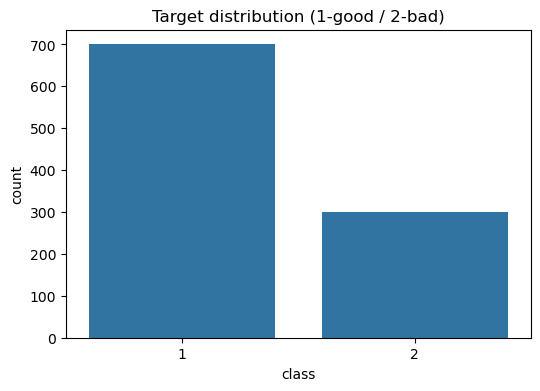

In [59]:
plt.figure(figsize=(6,4))
sns.countplot(data=y , x='class')
plt.title("Target distribution (1-good / 2-bad)")
plt.show()

# Data processing

In [63]:
X.isnull().sum() # check  null
# in case there were null values:
#    for col in X.select_dtypes(include=['object', 'category']):
#       X[col].fillna(X[col].mode()[0])
    
#    for col in X.select_dtypes(include=['int64', 'float64']):
#        X[col].fillna(X[col].median())

Attribute1     0
Attribute2     0
Attribute3     0
Attribute4     0
Attribute5     0
Attribute6     0
Attribute7     0
Attribute8     0
Attribute9     0
Attribute10    0
Attribute11    0
Attribute12    0
Attribute13    0
Attribute14    0
Attribute15    0
Attribute16    0
Attribute17    0
Attribute18    0
Attribute19    0
Attribute20    0
dtype: int64

In [81]:
# OneHotEncoder - Categorical values - get_dummies

X_encoded=pd.get_dummies(data=X, columns=categorical_cols, drop_first=True, dtype=int)

In [83]:
print(X.shape,X_encoded.shape)
print(X_encoded.head())

(1000, 20) (1000, 48)
   Attribute2  Attribute5  Attribute8  Attribute11  Attribute13  Attribute16  \
0           6        1169           4            4           67            2   
1          48        5951           2            2           22            1   
2          12        2096           2            3           49            1   
3          42        7882           2            4           45            1   
4          24        4870           3            4           53            2   

   Attribute18  Attribute1_A12  Attribute1_A13  Attribute1_A14  ...  \
0            1               0               0               0  ...   
1            1               1               0               0  ...   
2            2               0               0               1  ...   
3            2               0               0               0  ...   
4            2               0               0               0  ...   

   Attribute12_A124  Attribute14_A142  Attribute14_A143  Attribute15_A

In [87]:
# Standarization -- StandardScaler
scaler = StandardScaler()
X_encoded[numeric_cols] = scaler.fit_transform(X_encoded[numeric_cols])

In [91]:
print(X_encoded.head())
print(X_encoded.info())


   Attribute2  Attribute5  Attribute8  Attribute11  Attribute13  Attribute16  \
0   -1.236478   -0.745131    0.918477     1.046987     2.766456     1.027079   
1    2.248194    0.949817   -0.870183    -0.765977    -1.191404    -0.704926   
2   -0.738668   -0.416562   -0.870183     0.140505     1.183312    -0.704926   
3    1.750384    1.634247   -0.870183     1.046987     0.831502    -0.704926   
4    0.256953    0.566664    0.024147     1.046987     1.535122     1.027079   

   Attribute18  Attribute1_A12  Attribute1_A13  Attribute1_A14  ...  \
0    -0.428290               0               0               0  ...   
1    -0.428290               1               0               0  ...   
2     2.334869               0               0               1  ...   
3     2.334869               0               0               0  ...   
4     2.334869               0               0               0  ...   

   Attribute12_A124  Attribute14_A142  Attribute14_A143  Attribute15_A152  \
0              

# EDA

In [95]:
# Transform target 1-->1 / 2-->0
y_bin=y.replace({1:1,2:0})

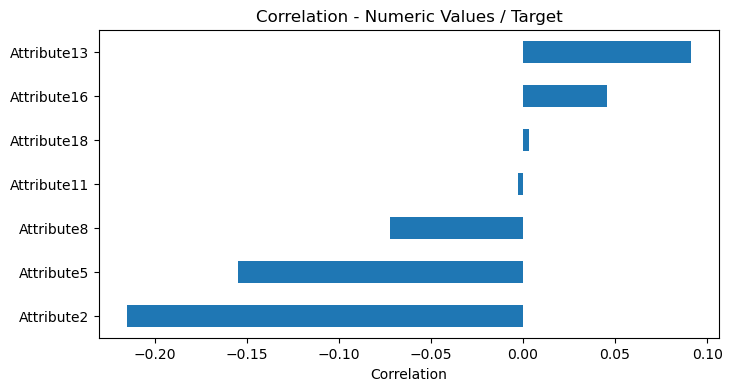

In [121]:
# Correlation 
corrs = X_encoded[numeric_cols].corrwith(y_bin['class'])

plt.figure(figsize=(8, 4))
corrs.sort_values().plot(kind='barh')
plt.title("Correlation - Numeric Values / Target")
plt.xlabel("Correlation")
plt.show()

In [115]:
y_bin

,class
0,1
1,0
2,1
3,1
4,0
...,...
995,1
996,1
997,1
998,0
